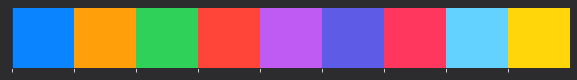

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

import joblib

from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [13]:
df=pd.read_csv('data/nba_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [14]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [15]:
cat_cols=df.select_dtypes(include=['object'])
print(cat_cols.columns)

Index(['player', 'pos', 'bref_team_id', 'season'], dtype='object')


In [16]:
df.drop(['player','season','season_end','bref_team_id'],axis=1,inplace=True)

In [17]:
y_og=df['pts']
scaler=RobustScaler()
le=LabelEncoder()
df['pos']=le.fit_transform(df['pos'])
df.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,5,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,0,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,3,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,6,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,0,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [19]:
train,test=train_test_split(df,test_size=0.2)
train=pd.DataFrame(scaler.fit_transform(train),columns=df.columns)
test=pd.DataFrame(scaler.transform(test),columns=df.columns)
X_train,y_train=train.drop(['pts'],axis=1),train['pts']
X_test,y_test=test.drop(['pts'],axis=1),test['pts']

In [22]:
X_train.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,0.0,-0.166667,-0.311111,0.672727,0.185207,0.746350,0.827376,0.025806,0.760870,0.858625,...,1.381317,0.438040,0.337349,0.403141,0.381783,1.608833,1.100478,-0.212389,1.340659,0.007968
1,-2.0,-0.166667,-0.822222,0.200000,-0.304734,-0.239051,-0.269398,0.438710,-0.224638,-0.246433,...,-0.076570,-1.596542,0.417671,-0.136126,0.001938,-0.283912,-0.239234,0.955752,-0.318681,-0.231076
2,-2.0,-0.333333,0.222222,0.000000,-0.029586,0.052920,-0.046207,1.329032,-0.224638,-0.246433,...,0.327718,-0.178674,1.108434,0.251309,0.455426,-0.176656,-0.239234,0.884956,0.054945,0.270916
3,-0.5,-0.333333,0.444444,1.236364,0.638462,1.114964,0.877942,1.419355,-0.224638,-0.236057,...,1.491577,-0.576369,3.277108,1.649215,2.013566,0.201893,0.755981,1.982301,0.879121,0.717131
4,-0.5,0.500000,-0.888889,-0.163636,-0.543787,-0.388686,-0.391456,-0.709677,-0.021739,0.038911,...,-0.327718,-1.031700,-0.449799,-0.539267,-0.505814,-0.365931,-0.507177,-0.283186,-0.527473,-0.693227
